In [2]:
# BAI TOAN TIM SO NGUYEN TO
# khong su dung numba

import math
import timeit

# class runtime(object):
#     def __init__(self, f):
#         self.f = f
#     def __call__(self, *args, **kwargs):
#         start = timeit.default_timer()
#         res = self.f(*args, **kwargs)
#         stop = timeit.default_timer()
#         print(stop - start, " (seconds)")
#         return res

def runtime(func):
    def func_wrapper(x):
        start = timeit.default_timer()
        res = func(x)
        stop = timeit.default_timer()
        print("Run without numba: ",stop - start, "(seconds)")
        return res
    return func_wrapper

def is_prime(number):
    if number == 2:
        return True
    if number <= 1 or not number % 2:
        return False
    max_range = int(math.sqrt(number)) + 1
    for div in range(3, max_range, 2):
        if not number % div:
            return False
    return True

    
@runtime
def run_program(max_number):
    for number in range(max_number):
        is_prime(number)

if __name__ == '__main__':
    run_program(5000000)

Run without numba:  13.035243300000001 (seconds)


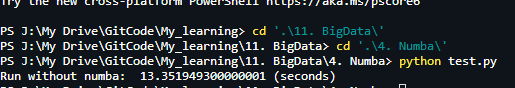

In [4]:
# BAI TOAN TIM SO NGUYEN TO
# su dung numba
from numba import njit
import math
import timeit

def runtime(func):
    def func_wrapper(x):
        start = timeit.default_timer()
        res = func(x)
        stop = timeit.default_timer()
        print("Run with numba: ",stop - start, "(seconds)")
        return res
    return func_wrapper

@njit(fastmath=True, cache=True)
def is_prime(number):
    if number == 2:
        return True
    if number <= 1 or not number % 2:
        return False
    max_range = int(math.sqrt(number)) + 1
    for div in range(3, max_range, 2):
        if not number % div:
            return False
    return True

@runtime
@njit( fastmath=True, cache=True)
def run_program(max_number):
    for number in range(max_number):
        is_prime(number)
        
if __name__ == '__main__':
    run_program(5000000)

Run with numba:  0.8710649999999944 (seconds)


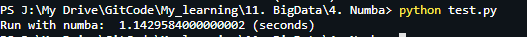

In [6]:


# BAI TOAN TIM SO NGUYEN TO
# su dung numba
from numba import njit, prange
import math
import timeit

def runtime(func):
    def func_wrapper(x):
        start = timeit.default_timer()
        res = func(x)
        stop = timeit.default_timer()
        print("Run with numba and parallel: ",stop - start, "(seconds)")
        return res
    return func_wrapper

@njit(fastmath=True, cache=True)
def is_prime(number):
    if number == 2:
        return True
    if number <= 1 or not number % 2:
        return False
    max_range = int(math.sqrt(number)) + 1
    for div in prange(3, max_range, 2):       # thay thế range thành prange
        if not number % div:
            return False
    return True

@runtime
@njit(fastmath=True, cache=True, parallel=True) # phép tính toán song song với các tác vụ có sự lặp lại
def run_program(max_number):
    for number in prange(max_number):         # thay thế range thành prange
        is_prime(number)
        
if __name__ == '__main__':
    run_program(5000000)

Run with numba and parallel:  0.003509600000001001 (seconds)


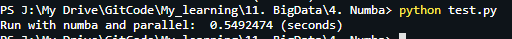